<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    👋 Hi everyone! 🌟
</h1>

<p style="
    text-align: center; 
    font-size: 1.2em;
    margin-bottom: 25px;
    position: relative;
    z-index: 1;
    font-weight: 500;
">
    I hope this notebook will be useful for beginners! 🚀
</p>

<div style="
    background: rgba(163, 230, 53, 0.1);
    border-left: 4px solid #a3e635;
    border-radius: 8px;
    padding: 20px;
    margin: 20px 0;
    position: relative;
    z-index: 1;
">
    <h3 style="
        color: #a3e635;
        margin-top: 0;
        font-size: 1.3em;
        display: flex;
        align-items: center;
        gap: 10px;
    ">
        🎯 Task: <span style="color: #f1f5f9;">Semantic Segmentation</span>
    </h3>
</div>

<div style="
    background: rgba(255, 255, 255, 0.05);
    border-radius: 10px;
    padding: 20px;
    position: relative;
    z-index: 1;
">
    <h3 style="
        color: #a3e635;
        margin-top: 0;
        font-size: 1.3em;
        display: flex;
        align-items: center;
        gap: 10px;
    ">
        ⚡ Challenges:
    </h3>
    <ul style="
        color: #f1f5f9;
        font-size: 1.1em;
        line-height: 1.6;
        margin-bottom: 0;
    ">
        <li>🖼️ Different sizes of images</li>
        <li>🧠 Difficult task for conventional models</li>
        <li>⚠️ Penalties for mistakes</li>
    </ul>
</div>

<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Importing libraries
</h1>

In [1]:
import os
import cv2
import json
import torch
import torchvision
import numpy as np
import pandas as pd
import torch.nn as nn
import albumentations as A
import matplotlib.pyplot as plt
import torch.nn.functional as F

from PIL import Image
from tqdm import tqdm
from collections import defaultdict
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader
from torchvision.models.detection import MaskRCNN
from sklearn.model_selection import train_test_split
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.transforms import functional as F_transforms

import warnings
warnings.filterwarnings('ignore')

# Checking GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

/usr/local/lib/python3.11/dist-packages/albumentations/check_version.py:147: UserWarning: Error fetching version info <urlopen error [Errno -3] Temporary failure in name resolution>
  data = fetch_version_info()


device(type='cuda')

<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Let's check the image sizes, sorry for the big conclusion, it's just that size is very important in CV tasks.
</h1>

In [ ]:
def get_unique_sizes(directory):
    size_counts = defaultdict(int)
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', 'JPG')):
                try:
                    with Image.open(os.path.join(root, file)) as img:
                        size = img.size
                        size_counts[size] += 1
                except Exception as e:
                    print(f"Error {file}: {e}")

    return size_counts

folders = [
    "/kaggle/input/recodai-luc-scientific-image-forgery-detection/train_images/authentic",
    "/kaggle/input/recodai-luc-scientific-image-forgery-detection/train_images/forged",
    "/kaggle/input/recodai-luc-scientific-image-forgery-detection/test_images"
]

for folder in folders:
    print(f"\n📂 Folder: {folder}")
    sizes = get_unique_sizes(folder)

    if not sizes:
        print("No images or mistake in code")
        continue

    sorted_sizes = sorted(sizes.items(), key=lambda x: x[1], reverse=True)

    print("┌───────────────┬───────────────┬─────────┐")
    print("│  Width (px)  │ Height (px) │ Quantity │")
    print("├───────────────┼───────────────┼─────────┤")
    for (w, h), count in sorted_sizes:
        print(f"│ {w:<13} │ {h:<13} │ {count:<7} │")
    print("└───────────────┴───────────────┴─────────┘")


📂 Folder: /kaggle/input/recodai-luc-scientific-image-forgery-detection/train_images/authentic
┌───────────────┬───────────────┬─────────┐
│  Width (px)  │ Height (px) │ Quantity │
├───────────────┼───────────────┼─────────┤
│ 1000          │ 666           │ 343     │
│ 256           │ 256           │ 290     │
│ 1600          │ 1200          │ 227     │
│ 696           │ 520           │ 116     │
│ 320           │ 256           │ 108     │
│ 2568          │ 1912          │ 95      │
│ 512           │ 512           │ 91      │
│ 360           │ 360           │ 91      │
│ 1024          │ 1024          │ 52      │
│ 3888          │ 2592          │ 50      │
│ 2592          │ 3888          │ 50      │
│ 1280          │ 1024          │ 18      │
│ 640           │ 512           │ 15      │
│ 514           │ 512           │ 8       │
│ 512           │ 513           │ 6       │
│ 513           │ 512           │ 6       │
│ 687           │ 512           │ 5       │
│ 1384          │ 1028     

<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Check all data structure
</h1>

In [ ]:
def analyze_data_structure():
    base_path = '/kaggle/input/recodai-luc-scientific-image-forgery-detection'

    # Checking train images
    train_authentic_path = os.path.join(base_path, 'train_images/authentic')
    train_forged_path = os.path.join(base_path, 'train_images/forged')
    train_masks_path = os.path.join(base_path, 'train_masks')
    test_images_path = os.path.join(base_path, 'test_images')

    print(f"Authentic images: {len(os.listdir(train_authentic_path))}")
    print(f"Forged images: {len(os.listdir(train_forged_path))}")
    print(f"Masks: {len(os.listdir(train_masks_path))}")
    print(f"Test images: {len(os.listdir(test_images_path))}")

    # Let's analyze some examples of masks
    mask_files = os.listdir(train_masks_path)[:5]
    print(f"Examples of mask files: {mask_files}")

    # Checking the mask format
    sample_mask = np.load(os.path.join(train_masks_path, mask_files[0]))
    print(f"Mask format: {sample_mask.shape}, dtype: {sample_mask.dtype}")

    test_files = os.listdir(test_images_path)
    print(f"Test images: {test_files}")

    return {
        'train_authentic': train_authentic_path,
        'train_forged': train_forged_path,
        'train_masks': train_masks_path,
        'test_images': test_images_path
    }

paths = analyze_data_structure()

Authentic images: 2377
Forged images: 2751
Masks: 2751
Test images: 1
Examples of mask files: ['59069.npy', '64134.npy', '18929.npy', '36106.npy', '422.npy']
Mask format: (1, 512, 711), dtype: uint8
Test images: ['45.png']


<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    🌟 Let's take a look at the image
</h1>

<div style="
    background: rgba(255, 255, 255, 0.05);
    border-radius: 10px;
    padding: 20px;
    position: relative;
    z-index: 1;
">
    <h3 style="
        color: #a3e635;
        margin-top: 0;
        font-size: 1.3em;
        display: flex;
        align-items: center;
        gap: 10px;
    ">
        Types:
    </h3>
    <ul style="
        color: #f1f5f9;
        font-size: 1.1em;
        line-height: 1.6;
        margin-bottom: 0;
    ">
        <li>Authentic: Real images without manipulation</li>
        <li>Tampered: Areas that have been manipulated</li>
    </ul>
</div>

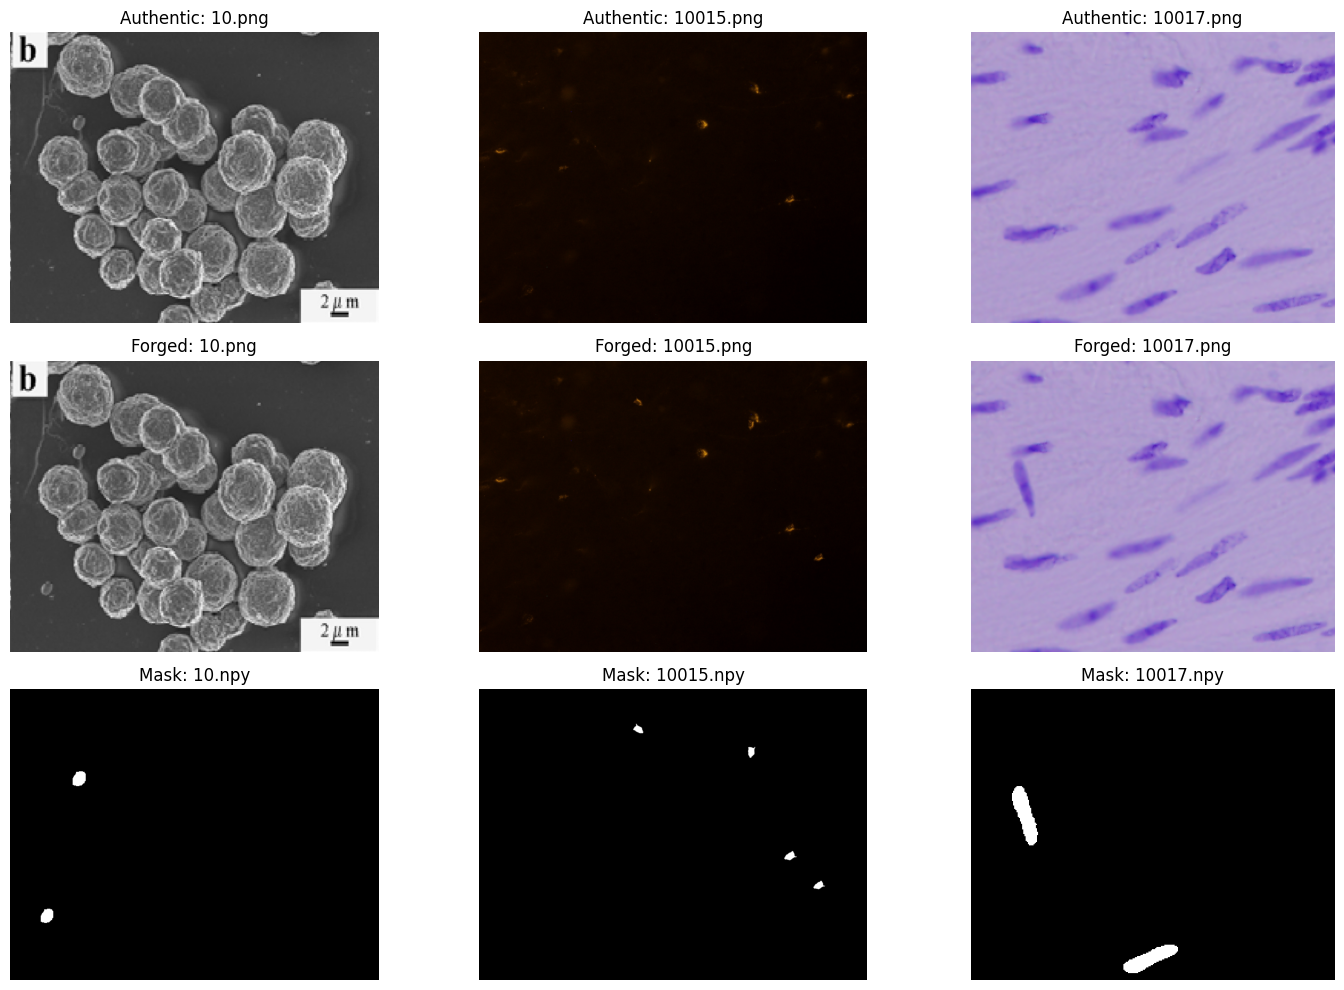

In [ ]:
num_samples = 3 # counts images/masks

# Visualize authentic images
authentic_files = sorted(os.listdir(paths['train_authentic']))[:num_samples]
forged_files = sorted(os.listdir(paths['train_forged']))[:num_samples]
mask_files = sorted(os.listdir(paths['train_masks']))[:num_samples]

fig, axes = plt.subplots(3, num_samples, figsize=(15, 10))

# Authentic images
for i, file in enumerate(authentic_files):
    img_path = os.path.join(paths['train_authentic'], file)
    img = Image.open(img_path)
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Authentic: {file}')
    axes[0, i].axis('off')

# Forged images
for i, file in enumerate(forged_files):
    img_path = os.path.join(paths['train_forged'], file)
    img = Image.open(img_path)
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Forged: {file}')
    axes[1, i].axis('off')

# Masks
for i, file in enumerate(mask_files):
    mask_path = os.path.join(paths['train_masks'], file)
    mask = np.load(mask_path)
    mask = np.squeeze(mask)
    axes[2, i].imshow(mask, cmap='gray')
    axes[2, i].set_title(f'Mask: {file}')
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()

<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Stats about image sizes
</h1>

Image size Statistics:
             width       height
count   100.000000   100.000000
mean   1085.120000   664.630000
std     850.207631   634.606546
min     234.000000    68.000000
25%     461.000000   256.000000
50%     943.500000   512.000000
75%    1448.500000  1024.000000
max    3888.000000  2592.000000


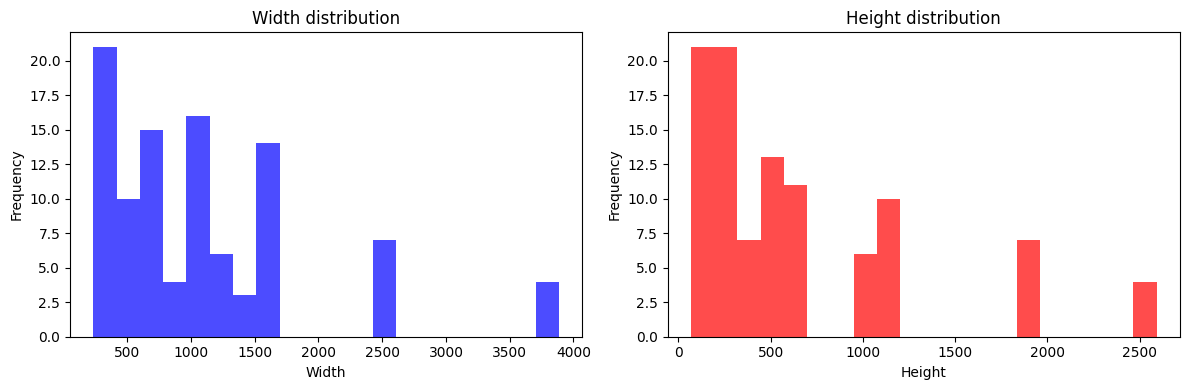

In [ ]:
all_sizes = []

# Authentic images
for file in os.listdir(paths['train_authentic'])[:50]:
    img_path = os.path.join(paths['train_authentic'], file)
    img = Image.open(img_path)
    all_sizes.append(img.size)

# Forged images
for file in os.listdir(paths['train_forged'])[:50]:
    img_path = os.path.join(paths['train_forged'], file)
    img = Image.open(img_path)
    all_sizes.append(img.size)

sizes_df = pd.DataFrame(all_sizes, columns=['width', 'height'])
print("Image size Statistics:")
print(sizes_df.describe())

# Visualization of the size distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(sizes_df['width'], bins=20, alpha=0.7, color='blue')
plt.title('Width distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sizes_df['height'], bins=20, alpha=0.7, color='red')
plt.title('Height distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Dataset Implementation for Forgery Detection
</h1>

In [ ]:
class ForgeryDataset(Dataset):
    def __init__(self, authentic_path, forged_path, masks_path, transform=None, is_train=True):
        self.transform = transform
        self.is_train = is_train

        # Collect all data samples
        self.samples = []

        # Authentic images
        for file in os.listdir(authentic_path):
            img_path = os.path.join(authentic_path, file)
            base_name = file.split('.')[0]
            mask_path = os.path.join(masks_path, f"{base_name}.npy")

            self.samples.append({
                'image_path': img_path,
                'mask_path': mask_path,
                'is_forged': False,
                'image_id': base_name
            })

        # Forged images
        for file in os.listdir(forged_path):
            img_path = os.path.join(forged_path, file)
            base_name = file.split('.')[0]
            mask_path = os.path.join(masks_path, f"{base_name}.npy")

            self.samples.append({
                'image_path': img_path,
                'mask_path': mask_path,
                'is_forged': True,
                'image_id': base_name
            })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]

        # Load image
        image = Image.open(sample['image_path']).convert('RGB')
        image = np.array(image)  # (H, W, 3)

        # Load and process mask
        if os.path.exists(sample['mask_path']):
            mask = np.load(sample['mask_path'])

            # Handle multi-channel masks
            if mask.ndim == 3:
                if mask.shape[0] <= 10:  # channels first (C, H, W)
                    mask = np.any(mask, axis=0)
                elif mask.shape[-1] <= 10:  # channels last (H, W, C)
                    mask = np.any(mask, axis=-1)
                else:
                    raise ValueError(f"Ambiguous 3D mask shape: {mask.shape}")

            mask = (mask > 0).astype(np.uint8)
        else:
            mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

        # Shape validation
        assert image.shape[:2] == mask.shape, f"Shape mismatch: img {image.shape}, mask {mask.shape}"

        # Apply transformations
        if self.transform:
            transformed = self.transform(image=image, mask=mask)
            image = transformed['image']
            mask = transformed['mask']
        else:
            image = F_transforms.to_tensor(image)
            mask = torch.tensor(mask, dtype=torch.uint8)

        # Prepare targets for Mask R-CNN
        if sample['is_forged'] and mask.sum() > 0:
            boxes, labels, masks = self.mask_to_boxes(mask)

            target = {
                'boxes': boxes,
                'labels': labels,
                'masks': masks,
                'image_id': torch.tensor([idx]),
                'area': (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]),
                'iscrowd': torch.zeros((len(boxes),), dtype=torch.int64)
            }
        else:
            # For authentic images or images without masks
            target = {
                'boxes': torch.zeros((0, 4), dtype=torch.float32),
                'labels': torch.zeros(0, dtype=torch.int64),
                'masks': torch.zeros((0, image.shape[1], image.shape[2]), dtype=torch.uint8),
                'image_id': torch.tensor([idx]),
                'area': torch.zeros(0, dtype=torch.float32),
                'iscrowd': torch.zeros((0,), dtype=torch.int64)
            }

        return image, target

    def mask_to_boxes(self, mask):
        """Convert segmentation mask to bounding boxes for Mask R-CNN"""
        if isinstance(mask, torch.Tensor):
            mask_np = mask.numpy()
        else:
            mask_np = mask

        # Find contours in the mask
        contours, _ = cv2.findContours(mask_np, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        boxes = []
        masks = []

        for contour in contours:
            if len(contour) > 0:
                x, y, w, h = cv2.boundingRect(contour)
                # Filter out very small regions
                if w > 5 and h > 5:
                    boxes.append([x, y, x + w, y + h])
                    # Create binary mask for this contour
                    contour_mask = np.zeros_like(mask_np)
                    cv2.fillPoly(contour_mask, [contour], 1)
                    masks.append(contour_mask)

        if boxes:
            boxes = torch.tensor(boxes, dtype=torch.float32)
            labels = torch.ones((len(boxes),), dtype=torch.int64)
            masks = torch.tensor(np.array(masks), dtype=torch.uint8)
        else:
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros(0, dtype=torch.int64)
            masks = torch.zeros((0, mask_np.shape[0], mask_np.shape[1]), dtype=torch.uint8)

        return boxes, labels, masks

# Transformations for learning
train_transform = A.Compose([
    A.Resize(256, 256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

val_transform = A.Compose([
    A.Resize(256, 256),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Creating datasets and dataloaders
</h1>

In [ ]:
full_dataset = ForgeryDataset(
    paths['train_authentic'],
    paths['train_forged'],
    paths['train_masks'],
    transform=train_transform
)

# Split into train/val
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

# Changing transformations for the val dataset
val_dataset.dataset.transform = val_transform

# Creating dataloaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

print(f"Train samples: {len(train_dataset)}")
print(f"Val samples: {len(val_dataset)}")

Train samples: 4102
Val samples: 1026


<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Creating a lightweight Mask R-CNN model
</h1>

In [ ]:
def create_light_mask_rcnn(num_classes=2):
    backbone = torchvision.models.mobilenet_v3_small(pretrained=False).features
    backbone.out_channels = 576

    # extracts characteristics from an image
    backbone = nn.Sequential(
        backbone,
        nn.Conv2d(576, 256, kernel_size=1),
        nn.ReLU(inplace=True)
    )
    backbone.out_channels = 256

    # Anchor generator
    anchor_generator = AnchorGenerator(
        sizes=((16, 32, 64, 128),),
        aspect_ratios=((0.5, 1.0, 2.0),)
    )

    # ROI pools
    roi_pooler = torchvision.ops.MultiScaleRoIAlign(
        featmap_names=['0'],
        output_size=5,
        sampling_ratio=1
    )

    mask_roi_pooler = torchvision.ops.MultiScaleRoIAlign(
        featmap_names=['0'],
        output_size=10,
        sampling_ratio=1
    )

    model = MaskRCNN(
        backbone,
        num_classes=num_classes,
        rpn_anchor_generator=anchor_generator,
        box_roi_pool=roi_pooler,
        mask_roi_pool=mask_roi_pooler,
        min_size=224,
        max_size=224,
        rpn_pre_nms_top_n_train=1000,
        rpn_pre_nms_top_n_test=1000,
        rpn_post_nms_top_n_train=200,
        rpn_post_nms_top_n_test=200,
        box_detections_per_img=100
    )

    return model

model = create_light_mask_rcnn()
model.to(device)

print(f"Number of parameters: {sum(p.numel() for p in model.parameters()):,}")

Number of parameters: 11,917,928


<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Functions for train and validate
</h1>

In [ ]:
def train_epoch(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0

    for batch_idx, (images, targets) in enumerate(tqdm(dataloader, desc="Training")):
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Forward pass
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        # Backward pass
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()

    return total_loss / len(dataloader)

def validate_epoch(model, dataloader, device):
    model.train()  # For validation, we use train mode because of the features of Mask R-CNN
    total_loss = 0

    with torch.no_grad():
        for batch_idx, (images, targets) in enumerate(tqdm(dataloader, desc="Validation")):
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            total_loss += losses.item()

    return total_loss / len(dataloader)

<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Vizualize batch before learning
</h1>

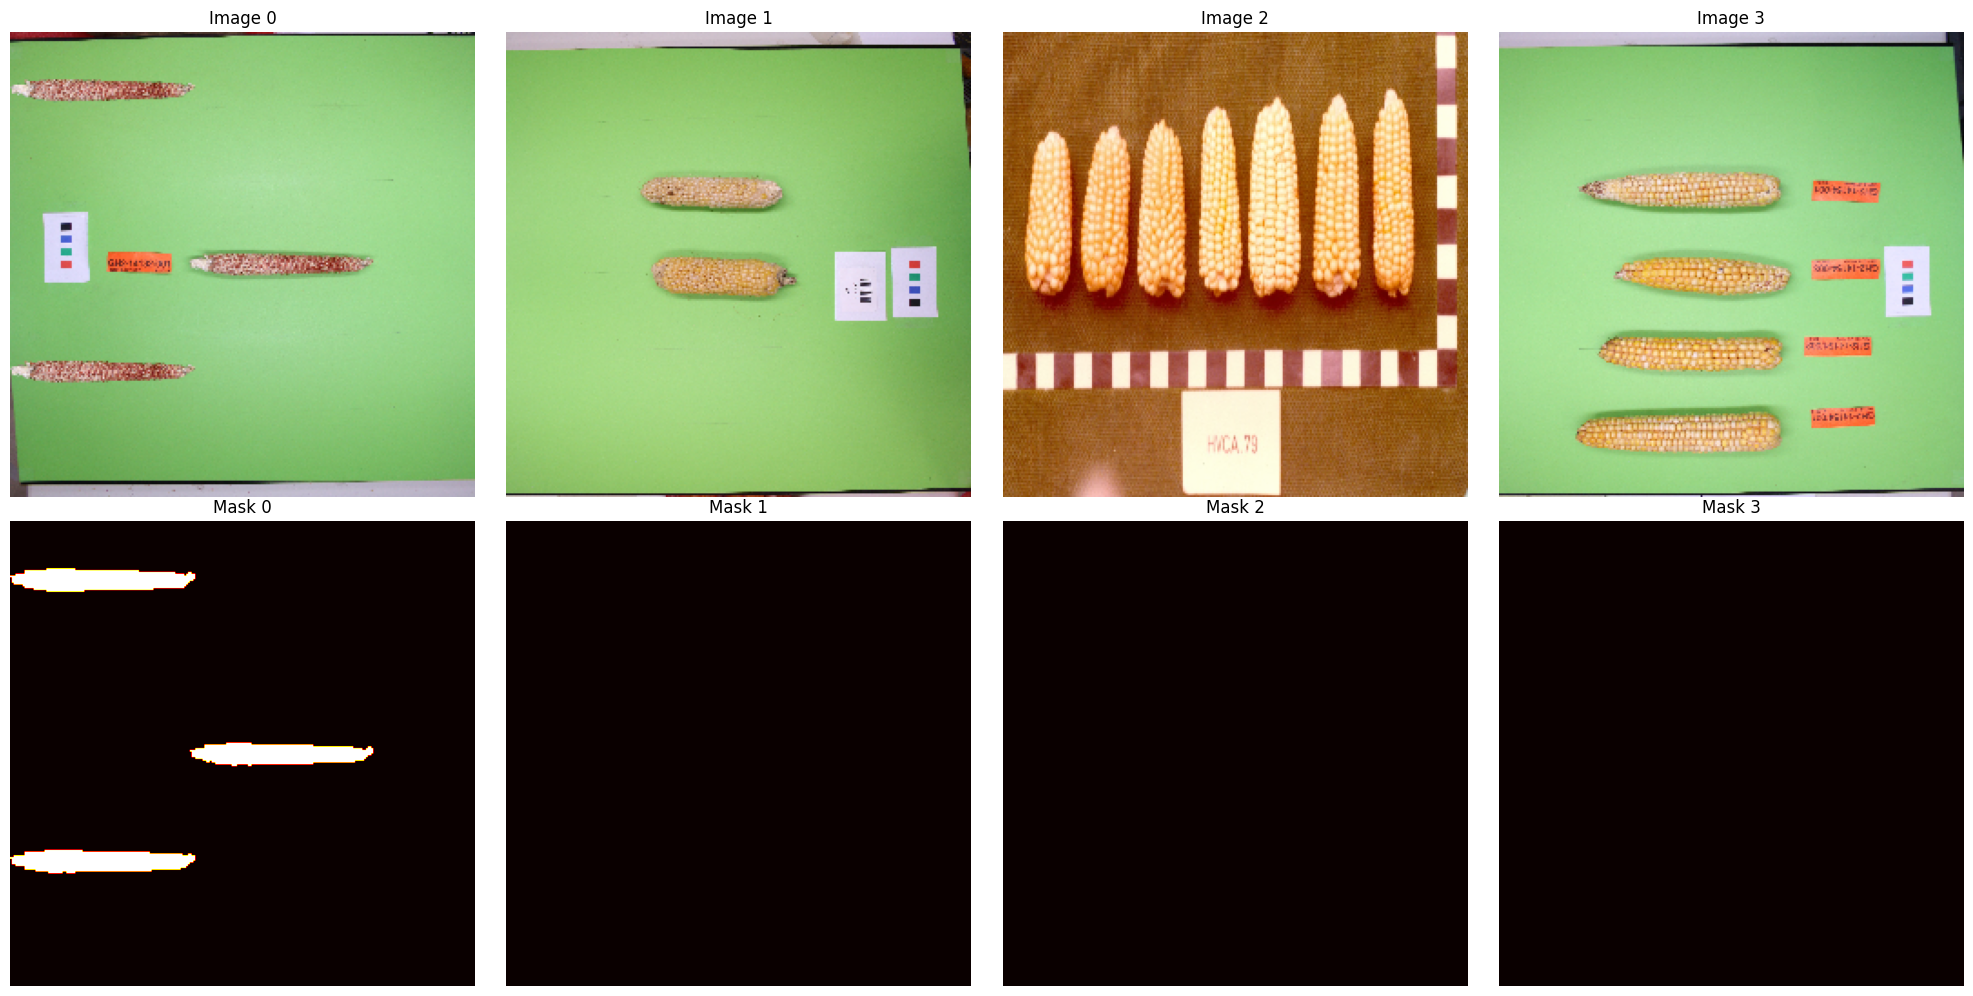

In [ ]:
def visualize_batch_samples(dataloader, model=None, device=device):
    images, targets = next(iter(dataloader))

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    for i in range(min(4, len(images))):
        # Original image
        img = images[i].cpu().permute(1, 2, 0).numpy()
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # denormalize
        img = np.clip(img, 0, 1)

        axes[0, i].imshow(img)
        axes[0, i].set_title(f'Image {i}')
        axes[0, i].axis('off')

        # Mask
        mask = torch.zeros_like(images[i][0])
        for target_mask in targets[i]['masks']:
            mask = torch.max(mask, target_mask.cpu())

        axes[1, i].imshow(mask, cmap='hot')
        axes[1, i].set_title(f'Mask {i}')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_batch_samples(train_loader)

<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Learn our R-CNN small model
</h1>

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

num_epochs = 3
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    # Train
    train_loss = train_epoch(model, train_loader, optimizer, device)
    train_losses.append(train_loss)

    # Validation
    val_loss = validate_epoch(model, val_loader, device)
    val_losses.append(val_loss)

    # Scheduler step
    scheduler.step()

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # We save the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        torch.save(model.state_dict(), f'mask_rcnn_epoch_{epoch+1}.pth')

Epoch 1/3


Validation: 100%|██████████| 257/257 [01:01<00:00,  4.15it/s]


Train Loss: 0.5681, Val Loss: 0.5574
Epoch 2/3


Validation: 100%|██████████| 257/257 [00:52<00:00,  4.90it/s]


Train Loss: 0.5329, Val Loss: 0.5329
Epoch 3/3


Validation: 100%|██████████| 257/257 [00:52<00:00,  4.85it/s]

Train Loss: 0.5268, Val Loss: 0.5274


<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Show results loss function
</h1>

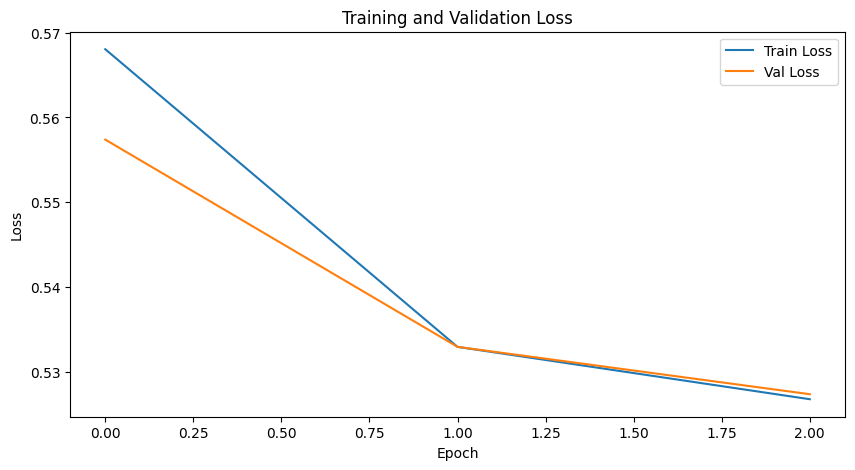

In [12]:
plt.figure(figsize=(10, 5))

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.legend()
plt.show()

<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Load and preprocess test images
</h1>

In [ ]:
def rle_encode(mask):
    """
    Encode binary mask to RLE in the format required by the competition.
    Returns a JSON string like "[123,4,567,8]"
    """
    # Ensure mask is 2D and binary
    mask = mask.astype(bool)

    # Flatten in Fortran order
    flat = mask.T.flatten()

    # Find indices where value is True
    dots = np.where(flat)[0]

    if len(dots) == 0:
        return json.dumps([])  # or just return 'authentic' upstream

    run_lengths = []
    prev = -2
    for b in dots:
        if b > prev + 1:
            run_lengths.extend([b + 1, 0])  # 1-based index
        run_lengths[-1] += 1
        prev = b

    # Convert numpy ints to Python ints for JSON compatibility
    run_lengths = [int(x) for x in run_lengths]
    return json.dumps(run_lengths)

def predict_test_images(model, test_path, device):
    model.eval()
    predictions = {}

    test_files = sorted(os.listdir(test_path))

    transform = A.Compose([
        A.Resize(256, 256),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])

    for file in tqdm(test_files, desc="Processing test images"):
        case_id = file.split('.')[0]

        # Load and preprocess image
        img_path = os.path.join(test_path, file)
        image = Image.open(img_path).convert('RGB')
        image_np = np.array(image)

        original_size = image_np.shape[:2]

        # Apply transformations
        transformed = transform(image=image_np)
        image_tensor = transformed['image'].unsqueeze(0).to(device)

        # Model prediction
        with torch.no_grad():
            prediction = model(image_tensor)

        # Process predictions
        masks = prediction[0]['masks']
        scores = prediction[0]['scores']

        # Filter by confidence threshold
        confidence_threshold = 0.4     # CHANGE THIS TO SEE RESULTS(changes)
        valid_detections = scores > confidence_threshold

        if valid_detections.sum() == 0:
            # No detections -> authentic image
            predictions[case_id] = "authentic"
        else:
            # Combine all detected masks
            combined_mask = torch.zeros((256, 256), device=device)
            for i in range(len(masks)):
                if valid_detections[i]:
                    mask = masks[i, 0] > 0.5  # Binarize mask
                    combined_mask = torch.logical_or(combined_mask, mask)

            # Convert to numpy and resize to original dimensions
            combined_mask_np = combined_mask.cpu().numpy().astype(np.uint8)
            combined_mask_resized = cv2.resize(combined_mask_np,
                                             (original_size[1], original_size[0]),
                                             interpolation=cv2.INTER_NEAREST)

            # RLE encoding
            if combined_mask_resized.sum() == 0:
                predictions[case_id] = "authentic"
            else:
                rle_json = rle_encode_competition(combined_mask_resized)
                predictions[case_id] = rle_json

    return predictions

predictions = predict_test_images(model, paths['test_images'], device)

Processing test images: 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]


<div style="
    background: linear-gradient(135deg, #1a2f0c 0%, #2d4a1a 50%, #4a4a1a 100%);
    border: 2px solid #a3e635;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(163, 230, 53, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(163, 230, 53, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #a3e635;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(163, 230, 53, 0.6);
    position: relative;
    z-index: 1;
">
    Create submission file
</h1>

In [ ]:
# Reading the sample submission for the correct order
sample_submission = pd.read_csv('/kaggle/input/recodai-luc-scientific-image-forgery-detection/sample_submission.csv')

# Create DataFrame with predictions
submission_data = []
for case_id in sample_submission['case_id']:
    case_id_str = str(case_id)
    if case_id_str in predictions:
        submission_data.append({'case_id': case_id, 'annotation': predictions[case_id_str]})
    else:
        # If case_id not in predictions, use authentic as default
        submission_data.append({'case_id': case_id, 'annotation': 'authentic'})

submission = pd.DataFrame(submission_data)

# Save submission file
submission.to_csv('submission.csv', index=False)

# Prediction statistics
authentic_count = (submission['annotation'] == 'authentic').sum()
forged_count = len(submission) - authentic_count

print(f"Prediction Statistics:")
print(f"Authentic: {authentic_count}")
print(f"Forged: {forged_count}")

Prediction Statistics:
Authentic: 1
Forged: 0


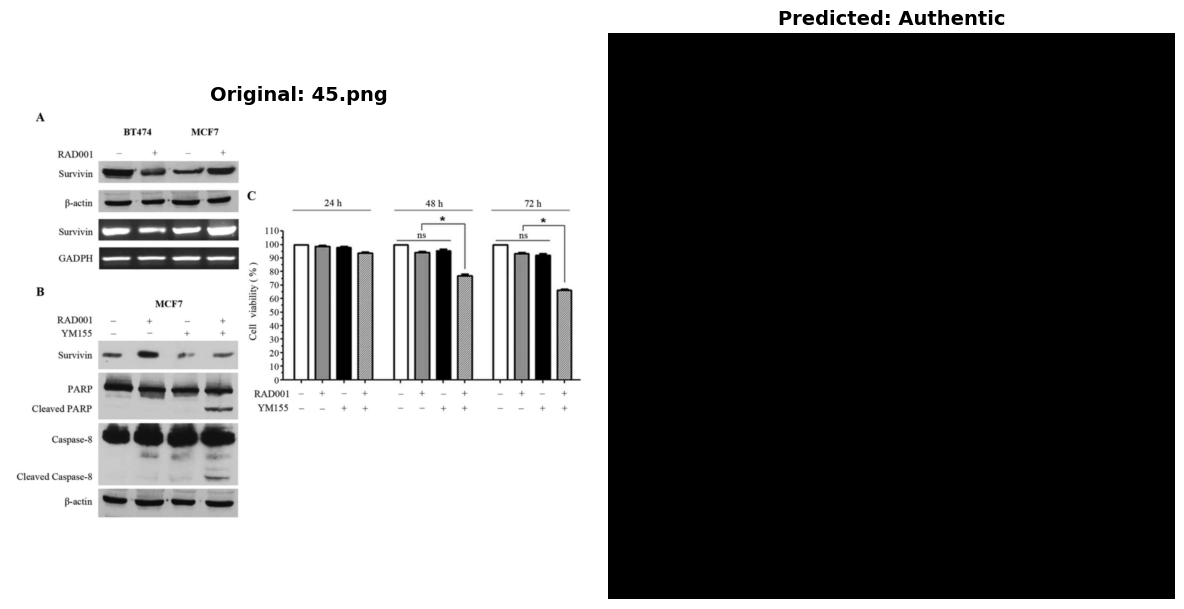

In [ ]:
model.eval()

# We take the first file from the test folder
test_files = sorted(os.listdir(paths['test_images']))
file = test_files[0]
img_path = os.path.join(paths['test_images'], file)

# Uploading an image
image = Image.open(img_path).convert('RGB')
image_np = np.array(image)

# Transformations
transform = A.Compose([
    A.Resize(256, 256),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

# Apply transformations and make predictions
transformed = transform(image=image_np)
image_tensor = transformed['image'].unsqueeze(0).to(device)

with torch.no_grad():
    prediction = model(image_tensor)

masks = prediction[0]['masks']
scores = prediction[0]['scores']
confidence_threshold = 0.5
valid_detections = scores > confidence_threshold

# Creating a shape: original on the left, mask on the right
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original
axes[0].imshow(image_np)
axes[0].set_title(f'Original: {file}', fontsize=14, fontweight='bold')
axes[0].axis('off')

# Mask
if valid_detections.sum() == 0:
    combined_mask = np.zeros((256, 256))
    title = 'Predicted: Authentic'
    cmap = 'gray'
else:
    combined_mask = np.zeros((256, 256), dtype=np.float32)
    for idx in range(len(masks)):
        if valid_detections[idx]:
            mask = masks[idx, 0] > 0.5
            combined_mask = np.maximum(combined_mask, mask.cpu().numpy().astype(np.float32))

    title = f'Predicted: Forged ({valid_detections.sum()} regions)'
    cmap = 'hot'

im = axes[1].imshow(combined_mask, cmap=cmap, vmin=0, vmax=1)
axes[1].set_title(title, fontsize=14, fontweight='bold')
axes[1].axis('off')

if valid_detections.sum() > 0:
    plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [16]:
submission = pd.read_csv('/kaggle/working/submission.csv')
submission.head()

,case_id,annotation
0,45,authentic


In [17]:
torch.save(model.state_dict(), 'final_mask_rcnn_model.pth')
print("The final model is saved as: 'final_mask_rcnn_model.pth'")

The final model is saved as: 'final_mask_rcnn_model.pth'
